# 聚类分析
类 -> 相似元素的集合

聚类分析 -> 选取元素的许多共同指标，通过分析元素的指标值来分辨元素之间的**差距**，从而将相似元素聚为一类

目标 -> 得到较高的**类内相似度**和较低的**类间相似度**（使得类间的距离尽可能大，类内样本与类中心的距离尽可能小）

## 样本的相似度度量
用数量化的方法描述元素之间的相似程度

假设用 $p$ 个指标来描述 $n$ 个待分类的样本（元素），则每个元素可以看成是 $R^p$ 空间中的一个点，因此可以用距离来度量**样本间的相似程度**

Definition (距离)：记 $\Omega$ 是样本点集, 距离 $d(,)$ 是 $\Omega \times \Omega \rightarrow R^{+}$ 的一个函数, 满足条件：

1. $d(x, y) \geq 0, \quad x, y \in \Omega$
2. $d(x, y)=d(y, x), x, y \in \Omega$
3. $d(x, y) \leq d(x, z)+d(z, y), x, y, z \in \Omega$

这一距离的定义满足正定性, 对称性和三角不等式。在聚类分析中, 对于定量变量, 最常用的是 Minkowski 距离：
$$ d_q(x, y)=\left[\sum_{k=1}^p\left|x_k-y_k\right|^q\right]^{\frac{1}{q}},{q>0} $$
其中， $x_k$ 是 $x$ 在第 $k$ 维的坐标值。

在 Minkowski 距离中, 当 $q=1,2$ 或 $q \rightarrow+\infty$ 时, 分别得到：
1. $q=1$，绝对值距离（Manhattan Distance）
$$ d_1(x, y)=\sum_{k=1}^p\left|x_k-y_k\right|$$
2. $q=2$，欧式距离 (Normal Distance)
$$d_2(x, y)=\left[\sum_{k=1}^p\left|x_k-y_k\right|^2\right]^{\frac{1}{2}}$$
3. $q\rightarrow+\infty$，Chebyshev距离
$$d_{\infty}(x, y)=\max _{1 \leq k \leq p}\left|x_k-y_k\right|$$
三者中最常用的是欧氏距离, 它的优点是：当坐标轴进行正交旋转时, 欧氏距离保持不变。

## 分类
1. KNN算法
2. K-Means算法
3. 层次聚类法

In [1424]:
import math
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from scipy.cluster.hierarchy import dendrogram,linkage,cut_tree

In [1425]:
def paint(data, cluster):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    cluster = cluster.copy()
    for i in range(len(cluster)):
        cluster[i] = colors[cluster[i]]
    plt.figure(figsize=(4, 4))
    plt.scatter(data[:,0], data[:,1], c=cluster)

### KNN算法
（在本节的讨论中, 使用欧氏距离(Normal Distance)衡量样本之间的相似度)

**思路**：如果一个样本在特征空间中的 $k$ 个最相似（即特征空间中最邻近）的样本中的大多数属于某一个类别, 则该样本也属于这个类别。

**基本计算过程**如下：
1. 计算已知类别数据集中的点与当前点之间的距离
2. 按距离递增次序排序 (从近到远)
3. 选取与当前点距离最小的 $k$ 个点
4. 统计前 $k$ 个点所在的类别出现的频率
5. 返回前 $k$ 个点出现频率最高的类别作为当前点的预测分类

In [1426]:
movie_data = {'功夫熊猫': [39, 0, 31, '喜剧片'],
              '叶问3': [3, 2, 65, '动作片'],
              '伦敦陷落': [2, 3, 55, '动作片'],
              '代理情人': [9, 38, 2, '爱情片'],
              '新步步惊心': [8, 34, 17, '爱情片'],
              '谍影重重': [5, 2, 57, '动作片'],
              '美人鱼': [21, 17, 5, '喜剧片'],
              '宝贝当家': [45, 2, 9, '喜剧片']}
# test sample
x = [23, 3, 17]
# Find the distance to all data in movie_data
KNN = []
for key, v in movie_data.items():
    d = math.sqrt((x[0] - v[0]) ** 2 + (x[1] - v[1]) ** 2 + (x[2] - v[2]) ** 2)
    KNN.append([key, round(d, 2)])
# Outputs: distance from the used movie to 唐人街探案
# print("distance:", KNN)
# paint()

# Sorted in ascending order by distance
KNN.sort(key=lambda dis: dis[1])
# k = 4; Select 4 samples with the smallest distance
KNN=np.array(KNN[:4])
print("4 smallest:", KNN)
print()
# Determine the frequency of the cluster the sample is in
# Output the cluster with the highest frequency
labels = {'喜剧片': 0,
          '动作片': 0,
          '爱情片': 0}

for s in KNN:
    label = movie_data[s[0]]
    labels[label[3]] += 1
labels = sorted(labels.items(),key=lambda l: l[1],reverse=True)
labels = np.array(labels)
print("frequency of labels:", labels)
print()
### find the most frequent label
most_freq_label = max(labels, key=lambda l: l[1])[0]
print("most frequent label:", most_freq_label)

4 smallest: [['美人鱼' '18.55']
 ['功夫熊猫' '21.47']
 ['宝贝当家' '23.43']
 ['新步步惊心' '34.44']]

frequency of labels: [['喜剧片' '3']
 ['爱情片' '1']
 ['动作片' '0']]

most frequent label: 喜剧片


**再用鸢尾花的数据集做聚类分析**

In [1427]:
# KNN distance
def distance(A, B):
    result = 0
    for i in range(len(A)):
        result += (B[i]-A[i])**2 
    return round(math.sqrt(result), 2)

In [1428]:
# Judge the type of point
def K_check_point(dots, check_list, result, labels, k):
    label = labels.copy()
    dis = []
    for i in check_list:
        dis.append(distance(dots, i))
    min_dis = []
    for j in range(k+1):
        min_dis.append(dis.index(min(dis)))
        dis[dis.index(min(dis))] = 100
    for s in min_dis:
        label[result[s]] += 1
    label = sorted(label.items(),key=lambda l: l[1],reverse=True)
    most_freq_label = max(label, key=lambda l: l[1])[0]
    return most_freq_label

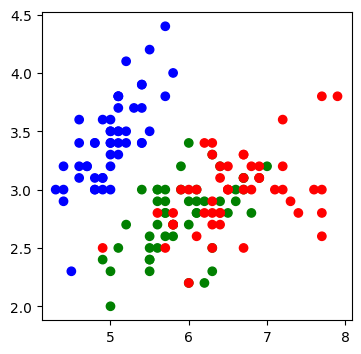

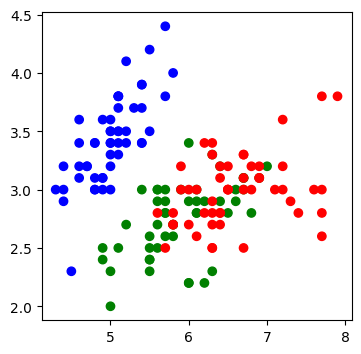

In [1429]:
lris_df = datasets.load_iris()
labels = {0:0,1:0,2:0}
cluster = []
for dot in lris_df.data:
    cluster.append(K_check_point(dot, lris_df.data, lris_df.target, labels, 4))
paint(lris_df.data, list(lris_df.target))
paint(lris_df.data, cluster)


### K-Means算法
**特点：数据集大时结果容易局部最优，对噪声和离群值非常敏感，非凸数据不能解决（月牙状）**

**思路**：通过迭代寻找 $k$ 个类簇的一种划分方案, 使得用这 $k$ 个类簇的均值来代表相应各类样本时，所得的总体误差最小。

**算法的基础**：**最小误差平方和准则**：

假设簇划分为 $\left(C_1, C_2, \ldots C_k\right)$, 则我们的目标是最小化平方误差 $E$，即 $C_i$ 中所有样本与 $C_i$ 质心的距离的平方和：
$$
E=\sum_{i=1}^k \sum_{x \in C_i}\left\|x-\mu_i\right\|_2^2
$$
其中 $\mu_i$ 是簇 $C_i$ 的均值向量，也称为质心，表达式为：
$$
\mu_i=\frac{1}{\left|C_i\right|} \sum_{x \in C_i} x
$$
其中，$\|C_i\|$ 表示 $C_i$ 中元素的个数

直接求上式的最小值不容易，这是个NP难问题。所以只能采用启发式的迭代方法：

随机选取 $k$ 个聚类质心点为 $\mu_1,\mu_2,\dots,\mu_k \in R^n$。重复下面过程直到收敛：

1. 对于每一个样本点 $i$ ，计算其应该属于的类
$$c^{(i)}=\arg \min _j\left\|x^{(i)}-\mu_j\right\|^2$$
2. 对于每一个类 $j$，重新计算该类的质心
$$\mu_i=\frac{1}{\left|C_j\right|} \sum_{x \in C_j} x$$
**收敛**：如果新计算出来的质心和原来的质心之间的距离小于某一个设置的阈值, 表示重新计算的质心的位置变化不大, 趋于稳定.

**计算过程**：
1. 画初始数据集的散点图
2. 随机选择n个类别所对应的n个别质心
3. 计算样本中所有点到这n个质心的距离，并标记每个样本的类别为：和该样本距离最小的质心的类别。
    至此得到了所有样本点第一轮迭代后所属的类别
4. 对当前不同类别的样本点，分别求类别新的n个质心
5. 重复3、4的过程，即**将所有点的类别标记为距离最近的质心的类别并求新的质心**。直到新质心与原质心的距离小于某个设定的阈值。

**关于K-Means++**

仅仅只是在初始化簇中心的方式上做了改进。而且sklearn.cluster的KMeans方法中包括了K-Means++。

**K-Means++基本步骤**
1. 随机选取一个点作为第一个聚类中心。
2. 计算所有样本与第一个聚类中心的距离。
3. 选择出上一步中距离最大的点作为第二个聚类中心。
4. **迭代**：计算所有点到与之最近的聚类中心的距离，选取最大距离的点作为新的聚类中心。**终止条件**：直到选出了k个中心。


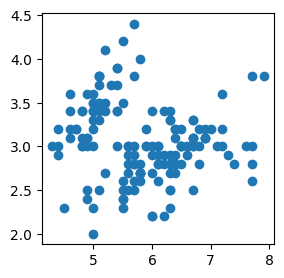

In [1430]:
### show the lris_df
lris_df = datasets.load_iris()
x_axis = lris_df.data[:,0]
y_axis = lris_df.data[:,1]
# Draw a scatterplot
plt.figure(figsize=(3, 3))
plt.scatter(x_axis, y_axis)

**看起来有噪点的原因：**

这是用lris_df数据集中的4列做的聚类，但画图的时候用的是前2列

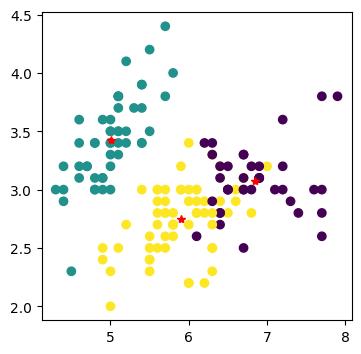

In [1431]:
# n_clusters: num of clusters; max_iter: maximum number of iterations; 
# n_init: Number of times to run the different centroid initialization value algorithm
# tol: Convergence condition
model = KMeans(n_clusters=3, max_iter=10000, n_init=100, tol=1e-8)
model.fit(lris_df.data)
plt.figure(figsize=(4, 4))
plt.scatter(x_axis, y_axis, c=model.labels_)
plt.plot(model.cluster_centers_[:,0],model.cluster_centers_[:,1],'r*')

这是用lris_df数据集中的前2列做的聚类，画图的时候用的也是前2列，

因此看上去几乎没有噪点

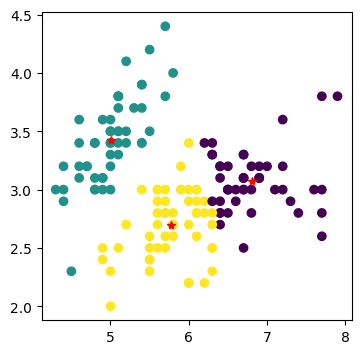

In [1432]:
# Choose the last two features of iris as clustering data
model = KMeans(n_clusters=3, max_iter=10000, n_init=100, tol=1e-8)
data = lris_df.data[:,:2]
model.fit(data)
plt.figure(figsize=(4, 4))
plt.scatter(data[:, 0], data[:, 1], c=model.labels_)
plt.plot(model.cluster_centers_[:,0],model.cluster_centers_[:,1],'r*')

这是用lris_df数据集中的后2列做的聚类，且画图的时候用的也是后2列

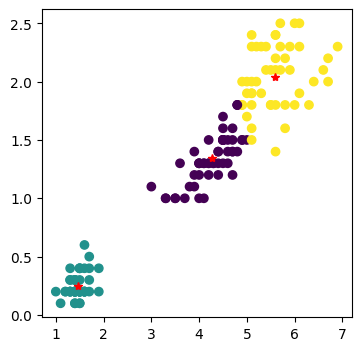

In [1433]:
# Choose the last two features of iris as clustering data
model = KMeans(n_clusters=3, max_iter=10000, n_init=100, tol=1e-8)
data = lris_df.data[:,2:]
model.fit(data)
plt.figure(figsize=(4, 4))
plt.scatter(data[:, 0], data[:, 1], c=model.labels_)
plt.plot(model.cluster_centers_[:,0],model.cluster_centers_[:,1],'r*')

### 层次聚类法
层次聚类法又叫系统聚类法

**特点：适用于小样本的聚类**

**优点**：可以指出由粗到细的多种分类情况，结果由一个聚类图展示出来

**聚类图生成步骤**：
1. 计算 $n$ 个样本点两两之间的距离 $\left\{d_{i j}\right\}$, 记为矩阵 $D=\left(d_{i j}\right)_{n \times n}$
2. 首先构造 $n$ 个类, 每一个类中只包含一个样本点, 每一类的平台高度均为零
3. 合并距离最近的两类为新类, 并且以这**两类间的距离值**作为聚类图中的**平台高度**
4. 计算新类与当前各类的距离, 若类的个数已经等于 1 , 转入步骤 5, 否则, 回到步骤 3
5. 画聚类图
6. 决定类的个数和类

**类间距离计算**

假设有两个样本类 $G_1$ 和 $G_2$，计算方法如下：
1. 最短距离法
$$D\left(G_1, G_2\right)=\min _{\substack{x_i \in G_1 \\ y_j \in G_2}}\left\{d\left(x_i, y_j\right)\right\}$$
2. 最长距离法(直观意义为两个类中最远两点间的距离。)
$$D\left(G_1, G_2\right)=\max _{\substack{x_i \in G_1 \\ y_j \in G_2}}\left\{d\left(x_i, y_j\right)\right\}$$
3. 重心法(其中 $\bar{x}, \bar{y}$ 分别为 $G_1, G_2$ 的重心)
$$D\left(G_1, G_2\right)=d(\bar{x}, \bar{y})$$
4. 类平均法(即 $G_1, G_2$ 中两样本点距离的平均, 式中 $n_1, n_2$ 分别为 $G_1, G_2$ 中的样本点个数)
$$
D\left(G_1, G_2\right)=\frac{1}{n_1 n_2} \sum_{x_i \in G_1 x_j \in G_2} d\left(x_i, x_j\right)
$$


(0.75, 6.25, -0.15000000000000002, 3.15)

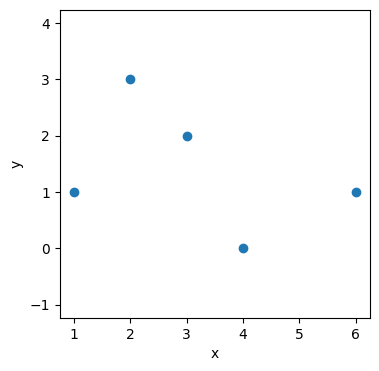

In [1434]:
data = np.array([[1,1],[2,3],[3,2],[4,0],[6,1]])
plt.figure(figsize=(4, 4))
plt.scatter(data[:,0], data[:,1]) 
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')

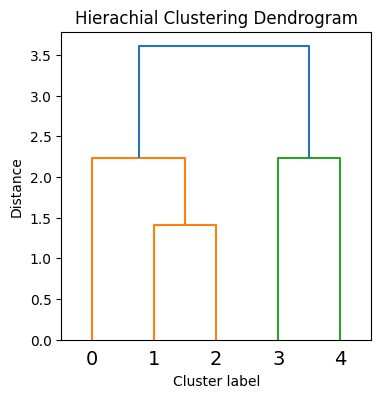

Text(0.5, 1.0, 'cluster by hierarchy')

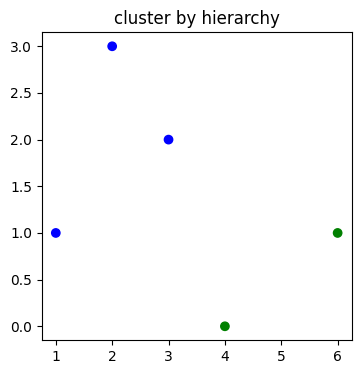

In [1435]:
### linkage is used to calculate the distance between clusters
z = linkage(data, "average") 
### fig is used to draw a figure, ax is used to draw a subplot
fig, ax = plt.subplots(figsize=(4,4))
### Question: What is dendrogram?
### Answer: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
dendrogram(z, leaf_font_size=14)
plt.title("Hierachial Clustering Dendrogram")
plt.xlabel("Cluster label")
plt.ylabel("Distance")
### plt.axhline is used to draw a horizontal line
plt.axhline(y=10) 
plt.show()

label = cut_tree(z, n_clusters=2)
paint(data, list(np.squeeze(label.T)))
plt.title('cluster by hierarchy')

Text(0.5, 1.0, 'cluster by iris')

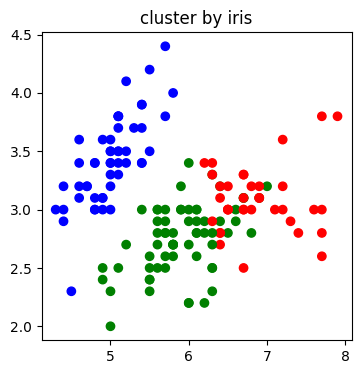

In [1436]:
z = linkage(iris.data, method ='ward',metric='euclidean')
label = cut_tree(z, n_clusters=3)

A=pd.DataFrame(iris.data,columns=iris.feature_names)
A['label']=label

paint(lris_df.data,  A['label'])
plt.title('cluster by iris')